In [1]:
import numpy as np
import syndat
import pandas as pd
import os
from matplotlib.pyplot import *
import PiTFAll as pf


In [2]:
%matplotlib widget

In [3]:
# Peformance Test for Fitting ALgorithm (PiTFALl)

In [4]:
# Initialize particle pair and quantup spin groups of interest

ac = 0.81271    # scattering radius in 1e-12 cm 
M = 180.948030  # amu of target nucleus
m = 1           # amu of incident neutron
I = 3.5         # intrinsic spin, positive parity
i = 0.5         # intrinsic spin, positive parity [sic: perhaps, angular momentum?]
l_max = 1       # highest order l-wave to consider

spin_groups = [ (3.0,1,[0]) ]
average_parameters = pd.DataFrame({ 'dE'    :   {'3.0':40.0, '4.0':15.0, '-4.0':15.0},
                                    'Gg'    :   {'3.0':80.0, '4.0':55.0, '-4.0':55.0},
                                    'gn2'    :   {'3.0':50, '4.0':10.0, '-4.0':10.0}  })

Ta_pair = syndat.particle_pair( ac, M, m, I, i, l_max,
                                spin_groups=spin_groups, average_parameters=average_parameters,
                                input_options={})


In [6]:

# initialize experimental setup
E_min_max = [100, 160]
input_options = { 'Perform Experiment':True,
            'Add Noise': True,
            'Calculate Covariance': True,
            'Compression Points':[],
            'Grouping Factors':None}

experiment_parameters = {'bw': {'val':0.3,    'unc'   :   0}}

exp = syndat.experiment(E_min_max, 
                        input_options=input_options, 
                        experiment_parameters=experiment_parameters)

In [7]:
# run a performance test with the PiTFAll module

case_directory = './perf_test_data'
number_of_datasets = 10

path_to_application_exe = '/Applications/MATLAB_R2021b.app/bin/matlab'
path_to_fitting_script = "/Users/noahwalton/Documents/GitHub/ATARI/baron_fit_rev1.m"

input_options = {   'Overwrite Syndats'    :   False, 
                    'Overwrite Fits'       :   False    } 

perf_test = pf.performance_test(number_of_datasets,
                                case_directory,
                                input_options=input_options)

perf_test.generate(Ta_pair, exp, 
                        solver='syndat_SLBW')

out = perf_test.fit(path_to_application_exe, path_to_fitting_script)
print(out)

Did not call subprocess for fitting - fits already existed


In [8]:
perf_test.analyze()

In [9]:
print(perf_test.SE_df)
print()
print(perf_test.chi_square_df)
print()
print(perf_test.chi_square_perdof_df)


    fit_exp  theo_exp      fit_theo
0  0.782504  0.782504  6.593432e-16
1  1.079054  1.079054  2.586696e-18
2  1.764282  1.764282  1.286875e-16
3  2.023240  2.023240  7.717748e-16
4  0.060427  0.060427  7.272944e-16
5  0.079208  0.079208  2.603046e-16
6  5.919281  5.919281  8.455072e-16
7  5.511335  5.511335  1.525537e-15
8  6.790738  6.790738  1.643205e-16
9  3.758106  3.758106  7.088429e-16

       fit_exp     theo_exp  fit_theo
0   936.721505   936.721518       NaN
1  1263.913123  1263.913124       NaN
2  1980.675330  1980.675333       NaN
3  2254.750539  2254.750563       NaN
4    90.511427    90.511435       NaN
5   119.456199   119.456197       NaN
6  5698.126921  5698.126962       NaN
7  5462.231326  5462.231414       NaN
8  6366.587812  6366.587833       NaN
9  3876.284353  3876.284379       NaN

     fit_exp   theo_exp  fit_theo
0   5.262480   5.262480       NaN
1   7.100636   7.100636       NaN
2  11.127389  11.127390       NaN
3  12.667138  12.667138       NaN
4   0.508491  

In [15]:
perf_test.case_array[4].pw_data

,E,theo_trans,exp_trans,exp_trans_unc,est_trans
0,160.000000,0.781412,0.782437,0.026172,0.781412
1,159.523706,0.781360,0.752146,0.025092,0.781360
2,159.049536,0.781306,0.773318,0.025969,0.781306
3,158.577477,0.781250,0.780237,0.025980,0.781250
4,158.107516,0.781191,0.767534,0.025507,0.781191
...,...,...,...,...,...
173,101.090076,0.784778,0.777618,0.027024,0.784778
174,100.850768,0.784771,0.766697,0.026622,0.784771
175,100.612309,0.784763,0.815767,0.028310,0.784763
176,100.374695,0.784756,0.772412,0.027037,0.784756


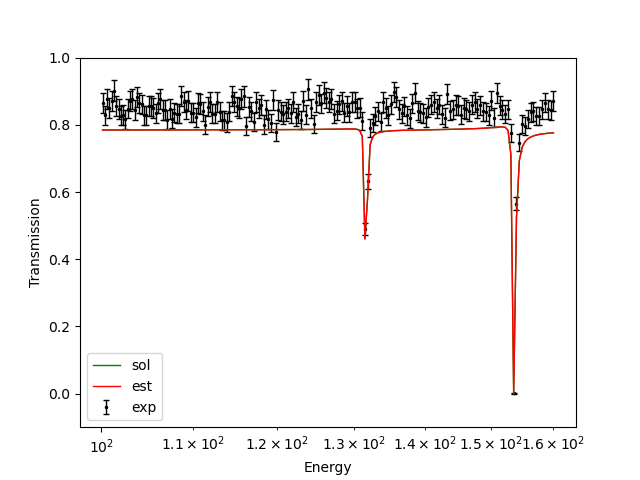

In [10]:
perf_test.plot_trans(0)

In [15]:
# import subprocess
# overwrite_fits = False

# for i in [5]:
            
#     sample_directory = os.path.join(case_directory, f'sample_{i}')

#     # check for isample directory
#     if os.path.isdir(sample_directory):

#         # check for syndat
#         syndat_pw = os.path.join(sample_directory, f'syndat_{i}_pw.csv')
#         syndat_par = os.path.join(sample_directory, f'syndat_{i}_par.csv')
#         if os.path.isfile(syndat_pw) and os.path.isfile(syndat_par):
#             pass
#         else:
#             raise ValueError(f'Syndat in sample directory {os.path.abspath(sample_directory)} does not exist.')

#         # check for fits
#         fit_pw = os.path.join(sample_directory, f'fit_{i}_pw.csv')
#         fit_par = os.path.join(sample_directory, f'fit_{i}_par.csv')
#         if os.path.isfile(fit_pw) and os.path.isfile(fit_par):
#             if overwrite_fits:
#                 pass
#             else:
#                 out = "Did not call subprocess for fitting - fits already existed"
#         else:
#             fitting_script = os.path.splitext(os.path.basename(path_to_fitting_script))[0]
#             fitting_script_directory = os.path.dirname(path_to_fitting_script)

#             out = subprocess.run([f'{path_to_application_exe}', '-nodisplay', '-batch', f'{fitting_script}("{syndat_pw}","{syndat_par}")'],
#                                     cwd=f'{fitting_script_directory}' , check=False, encoding="utf-8", capture_output=True)

#     else:
#         raise ValueError(f'Sample directory {os.path.abspath(sample_directory)} does not exist.')




CompletedProcess(args=['/Applications/MATLAB_R2021b.app/bin/matlab', '-nodisplay', '-batch', 'baron_fit_rev1("./perf_test_data/sample_5/syndat_5_pw.csv","./perf_test_data/sample_5/syndat_5_par.csv")'], returncode=1, stdout='', stderr="{\x08Error using baron_fit_rev1 (line 35)\nUnrecognized table variable name 'E'.\n}\x08 \n")